In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import random
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.utils import resample
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')
train_data_copy = train_data.copy(deep = True)
data_cleaner = [train_data_copy, test_data]
print (train_data.info())
train_data.sample(10)

#critical af variables:
# SPECIES, LOCATION, AND TIME are explanatory variables
# WNVPRESENT is the response variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB
None


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
10280,2013-09-12,"West Garfield Boulevard, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,90,W GARFIELD BLVD,T226,"9000 W GARFIELD BLVD, Chicago, IL",41.793818,-87.654234,5,7,0
4831,2009-07-17,"6300 West 64th Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,63,W 64TH ST,T155,"6300 W 64TH ST, Chicago, IL",41.776156,-87.778927,9,4,0
3662,2007-10-04,"2800 North Francisco Avenue, Chicago, IL 60618...",CULEX PIPIENS/RESTUANS,28,N FRANCISCO AVE,T147,"2800 N FRANCISCO AVE, Chicago, IL",41.932094,-87.700117,8,4,0
2107,2007-08-16,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0
3604,2007-10-04,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX PIPIENS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
4078,2009-06-12,"7200 North Oketo Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,72,N OKETO AVE,T016,"7200 N OKETO AVE, Chicago, IL",42.011601,-87.811506,8,5,0
9846,2013-08-22,"ORD Terminal 5, O'Hare International Airport, ...",CULEX SALINARIUS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,1,0
9774,2013-08-22,"6000 West Montrose Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,60,W MONTROSE DR,T017,"6000 W MONTROSE DR, Chicago, IL",41.960616,-87.777189,9,5,0
8075,2011-09-30,"1100 North Artesian Avenue, Chicago, IL 60622,...",CULEX PIPIENS/RESTUANS,11,S ARTESIAN AVE,T160,"1100 S ARTESIAN AVE, Chicago, IL",41.903002,-87.688267,8,1,0
7025,2011-07-29,"3700 South Pulaski Road, Chicago, IL 60623, USA",CULEX RESTUANS,37,S PULASKI RD,T063,"3700 S PULASKI RD, Chicago, IL",41.825610,-87.726549,9,1,0


In [4]:
print ('Train columns with null values:\n', train_data_copy.isnull().sum())
print ("-"*10)

print ('Test/Validation columns with null values:\n', test_data.isnull().sum())
print ("-"*10)

test_data.describe(include = 'all')

Train columns with null values:
 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
----------
Test/Validation columns with null values:
 Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64
----------


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293,116293,116293,116293.000000,116293,116293,116293,116293.000000,116293.000000,116293.000000
unique,NaN,95,151,8,NaN,139,149,151,NaN,NaN,NaN
top,NaN,2012-07-09,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,NaN,N OAK PARK AVE,T009,"1000 W OHARE AIRPORT, Chicago, IL",NaN,NaN,NaN
freq,NaN,1293,1468,15359,NaN,1617,1528,1468,NaN,NaN,NaN
mean,58147.000000,NaN,NaN,NaN,41.131100,NaN,NaN,NaN,41.849389,-87.693658,7.954357
std,33571.041765,NaN,NaN,NaN,24.864726,NaN,NaN,NaN,0.106593,0.080699,1.252733
min,1.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,41.644612,-87.930995,3.000000
25%,29074.000000,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,41.753411,-87.750938,8.000000
50%,58147.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,41.862292,-87.694991,8.000000
75%,87220.000000,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,41.951866,-87.648860,9.000000


In [5]:
label = LabelEncoder()
for dataset in data_cleaner:
  #SPECIES
  dataset['Species_Code'] = label.fit_transform(dataset['Species'])

  #LOCATION
  dataset['LatBin'] = pd.cut(dataset['Latitude'], 10)
  dataset['LatBin_Code'] = label.fit_transform(dataset['LatBin'])
  dataset['LongBin'] = pd.cut(dataset['Longitude'], 10)
  dataset['LongBin_Code'] = label.fit_transform(dataset['LongBin'])

  dataset['AddressNum'] = [my_str.split(" ")[0] for my_str in dataset['AddressNumberAndStreet'].values]
  dataset['AddressNum'] = dataset['AddressNum'].convert_objects(convert_numeric = True)
  dataset['AddressNumBin'] = pd.cut(dataset['AddressNum'], 10)
  dataset['AddressNumBin_Code'] = label.fit_transform(dataset['AddressNumBin'])

###
#VER. 2
#North: x > 41.875
#Center: 41.81 < x < 41.875
#South: x < 41.81

#  dataset['Location'] = 'North'
#  dataset.loc[(dataset['Latitude'] < 41.875) & (dataset['Latitude'] > 41.81), 'Location'] = 'Center'
#  dataset.loc[dataset['Latitude'] < 41.81, 'Location'] = 'South'
#  dataset['Location_Code'] = 2
#  dataset.loc[(dataset['Latitude'] < 41.875) & (dataset['Latitude'] > 41.81), 'Location_Code'] = 1
#  dataset.loc[dataset['Latitude'] < 41.81, 'Location_Code'] = 0
###

###
#VER. 1
#  dataset['Location'] = 'North'
#  dataset.loc[dataset['Latitude'] < 41.83, 'Location'] = 'South'
#  dataset['Location_Code'] = 1
#  dataset.loc[dataset['Latitude'] < 41.83, 'Location_Code'] = 0
###

  #TIME
  dataset['Year'] = [my_str.split("-")[0] for my_str in dataset['Date'].values]
  dataset['Year'] = dataset['Year'].convert_objects(convert_numeric = True)
  dataset['Month'] = [my_str.split("-")[1] for my_str in dataset['Date'].values]
  dataset['Month'] = dataset['Month'].convert_objects(convert_numeric = True)
    
  #MISC.
  dataset['TrapNum'] = [my_str.split("T")[1] for my_str in dataset['Trap'].values]
  dataset['TrapNum'] = dataset['TrapNum'].convert_objects(convert_numeric = True)
  dataset['TrapNumBin'] = pd.cut(dataset['TrapNum'], 10)
  #dataset['TrapNumBin_Code'] = label.fit_transform(dataset['TrapNumBin'])
  ###DIS SHIT NEED TO BE FIXED ASAP
  dataset['TrapNumBin_Code'] = 0
  dataset.loc[(dataset['TrapNum'] > 91.2) & (dataset['TrapNum'] < 181.4), 'TrapNumBin_Code'] = 1
  dataset.loc[(dataset['TrapNum'] > 181.4) & (dataset['TrapNum'] < 271.6), 'TrapNumBin_Code'] = 2
  dataset.loc[(dataset['TrapNum'] > 812.8) & (dataset['TrapNum'] < 903.0), 'TrapNumBin_Code'] = 3
    

train_data_copy.info()
test_data.info()
train_data_copy.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 25 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
Species_Code              10506 non-null int64
LatBin                    10506 non-null category
LatBin_Code               10506 non-null int64
LongBin                   10506 non-null category
LongBin_Code              10506 non-null int64
AddressNum                10506 non-null int64
AddressNumBin             105

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,LongBin,LongBin_Code,AddressNum,AddressNumBin,AddressNumBin_Code,Year,Month,TrapNum,TrapNumBin,TrapNumBin_Code
3924,2009-06-02,"6000 West Montrose Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,60,W MONTROSE DR,T017,"6000 W MONTROSE DR, Chicago, IL",41.960616,-87.777189,9,...,"(-87.811, -87.771]",3,6000,"(5400.0, 6280.0]",5,2009,6,17.0,"(0.098, 91.2]",0
2957,2007-09-05,"5200 South Kolmar Avenue, Chicago, IL 60632, USA",CULEX PIPIENS,52,S KOLMAR,T114,"5200 S KOLMAR, Chicago, IL",41.798697,-87.736812,8,...,"(-87.771, -87.731]",4,5200,"(4520.0, 5400.0]",4,2007,9,114.0,"(91.2, 181.4]",1
8265,2013-06-14,"3700 118th Street, Chicago, IL 60617, USA",CULEX RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,...,"(-87.572, -87.532]",9,3700,"(3640.0, 4520.0]",3,2013,6,212.0,"(181.4, 271.6]",2
7854,2011-09-16,"6100 North Lemont Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,61,N LEMONT AVE,T012,"6100 N LEMONT AVE, Chicago, IL",41.991429,-87.747113,8,...,"(-87.771, -87.731]",4,6100,"(5400.0, 6280.0]",5,2011,9,12.0,"(0.098, 91.2]",0
8035,2011-09-23,"5100 North Mont Clare Avenue, Chicago, IL 6065...",CULEX RESTUANS,51,N MONT CLARE AVE,T223,"5100 N MONT CLARE AVE, Chicago, IL",41.973845,-87.805059,9,...,"(-87.811, -87.771]",3,5100,"(4520.0, 5400.0]",4,2011,9,223.0,"(181.4, 271.6]",2
400,2007-07-11,"6700 South Kedzie Avenue, Chicago, IL 60629, USA",CULEX PIPIENS/RESTUANS,67,S KEDZIE AVE,T066,"6700 S KEDZIE AVE, Chicago, IL",41.771660,-87.703047,8,...,"(-87.731, -87.691]",5,6700,"(6280.0, 7160.0]",6,2007,7,66.0,"(0.098, 91.2]",0
1975,2007-08-15,"6700 South Kedzie Avenue, Chicago, IL 60629, USA",CULEX PIPIENS,67,S KEDZIE AVE,T066,"6700 S KEDZIE AVE, Chicago, IL",41.771660,-87.703047,8,...,"(-87.731, -87.691]",5,6700,"(6280.0, 7160.0]",6,2007,8,66.0,"(0.098, 91.2]",0
7505,2011-08-26,"1100 South California Avenue, Chicago, IL 6061...",CULEX PIPIENS/RESTUANS,11,S CALIFORNIA,T047,"1100 S CALIFORNIA, Chicago, IL",41.868142,-87.696269,9,...,"(-87.731, -87.691]",5,1100,"(991.2, 1880.0]",0,2011,8,47.0,"(0.098, 91.2]",0
7316,2011-08-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,...,"(-87.891, -87.851]",1,1000,"(991.2, 1880.0]",0,2011,8,900.0,"(812.8, 903.0]",3
5998,2009-10-01,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,...,"(-87.691, -87.651]",6,1700,"(991.2, 1880.0]",0,2009,10,94.0,"(91.2, 181.4]",1


In [6]:
### CHILLAX THIS IS A TEST PEOPLE
weather = pd.read_csv('./input/weather.csv')
train_data_copy = train_data_copy.merge(weather)
test_data = test_data.merge(weather)
train_data_copy['TminBin'] = pd.cut(train_data_copy['Tmin'],5)
train_data_copy['TminBin_Code'] = label.fit_transform(train_data_copy['TminBin'])
train_data_copy['DewPointBin'] = pd.cut(train_data_copy['DewPoint'],5)
train_data_copy['DewPointBin_Code'] = label.fit_transform(train_data_copy['DewPointBin'])
test_data['TminBin'] = pd.cut(test_data['Tmin'],5)
test_data['TminBin_Code'] = label.fit_transform(test_data['TminBin'])
test_data['DewPointBin'] = pd.cut(test_data['DewPoint'],5)
test_data['DewPointBin_Code'] = label.fit_transform(test_data['DewPointBin'])

###DOES NOT WORK FOR SOME REASON
#for dataset in data_cleaner:
#  dataset['TminBin'] = pd.cut(dataset['Tmin'], 5)
#  dataset['TminBin_Code'] = label.fit_transform(dataset['TminBin'])
#  dataset['DewPointBin'] = pd.cut(dataset['DewPoint'], 5)
#  dataset['DewPointBin_Code'] = label.fit_transform(dataset['DewPointBin'])

print (train_data_copy.info()) # last row index is 2943!
train_data_copy.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 21011
Data columns (total 50 columns):
Date                      21012 non-null object
Address                   21012 non-null object
Species                   21012 non-null object
Block                     21012 non-null int64
Street                    21012 non-null object
Trap                      21012 non-null object
AddressNumberAndStreet    21012 non-null object
Latitude                  21012 non-null float64
Longitude                 21012 non-null float64
AddressAccuracy           21012 non-null int64
NumMosquitos              21012 non-null int64
WnvPresent                21012 non-null int64
Species_Code              21012 non-null int64
LatBin                    21012 non-null category
LatBin_Code               21012 non-null int64
LongBin                   21012 non-null category
LongBin_Code              21012 non-null int64
AddressNum                21012 non-null int64
AddressNumBin             210

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,TminBin,TminBin_Code,DewPointBin,DewPointBin_Code
18082,2013-07-25,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,0.00,29.33,30.05,4.1,23,5.1,"(56.2, 63.8]",2,"(52.0, 59.0]",2
3980,2007-08-15,"4700 South Cornell Avenue, Chicago, IL 60615, USA",CULEX RESTUANS,47,S CORNELL AVE,T075,"4700 S CORNELL AVE, Chicago, IL",41.799282,-87.585487,8,...,0.23,29.17,29.89,3.4,7,5.8,"(63.8, 71.4]",3,"(66.0, 73.0]",4
19367,2013-08-15,"8200 South Kostner Avenue, Chicago, IL 60652, USA",CULEX PIPIENS,82,S KOSTNER AVE,T225,"8200 S KOSTNER AVE, Chicago, IL",41.743402,-87.731435,8,...,0.00,29.47,30.13,4.5,22,5.0,"(56.2, 63.8]",2,"(45.0, 52.0]",1
9804,2009-07-24,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,...,0.14,29.08,29.83,8.9,23,9.8,"(56.2, 63.8]",2,"(52.0, 59.0]",2
16732,2013-06-21,"3900 South Ashland Avenue, Chicago, IL 60609, USA",CULEX RESTUANS,39,S ASHLAND AVE,T074,"3900 S ASHLAND AVE, Chicago, IL",41.822536,-87.666343,9,...,0.79,29.34,30.04,7.4,19,9.5,"(63.8, 71.4]",3,"(59.0, 66.0]",3
6255,2007-09-12,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,...,0.00,29.46,30.11,1.9,5,6.0,"(40.962, 48.6]",0,"(37.965, 45.0]",0
5012,2007-08-22,"South Cottage Grove Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S COTTAGE GROVE,T102,"1000 S COTTAGE GROVE, Chicago, IL",41.750498,-87.605294,5,...,0.37,29.23,29.94,5.3,21,9.5,"(63.8, 71.4]",3,"(66.0, 73.0]",4
3007,2007-08-07,"6500 North Oak Park Avenue, Chicago, IL 60631,...",CULEX PIPIENS,65,N OAK PARK AVE,T143,"6500 N OAK PARK AVE, Chicago, IL",41.999129,-87.795585,8,...,0.06,29.11,29.74,6.3,24,8.8,"(71.4, 79.0]",4,"(66.0, 73.0]",4
17215,2013-07-08,"7100 South South Shore Drive, Chicago, IL 6064...",CULEX TERRITANS,71,S SOUTH SHORE DR,T079,"7100 S SOUTH SHORE DR, Chicago, IL",41.766202,-87.562889,9,...,0.84,29.31,29.95,10.0,22,10.5,"(63.8, 71.4]",3,"(66.0, 73.0]",4
9518,2009-07-17,"5800 North Western Avenue, Chicago, IL 60659, USA",CULEX PIPIENS,58,N WESTERN AVE,T028,"5800 N WESTERN AVE, Chicago, IL",41.986921,-87.689778,9,...,0.00,29.15,29.87,10.6,30,10.8,"(56.2, 63.8]",2,"(45.0, 52.0]",1


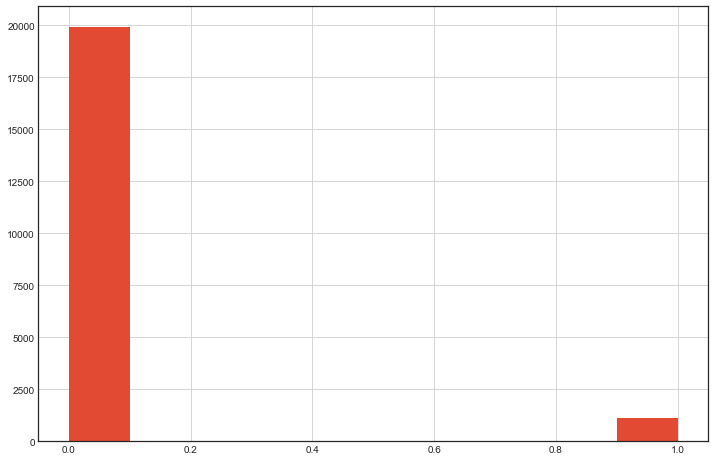

In [7]:
train_data_copy['WnvPresent'].hist()

In [8]:
df = train_data_copy
df['WnvPresent'].value_counts()

0    19910
1     1102
Name: WnvPresent, dtype: int64

In [9]:
df_majority = df[df.WnvPresent==0]
df_minority = df[df.WnvPresent==1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=551,     # to match minority class
                                 random_state=123) # reproducible results

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.WnvPresent.value_counts()
train_data_copy = df_downsampled
train_data_copy.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,TminBin,TminBin_Code,DewPointBin,DewPointBin_Code
6495,2007-09-18,"7000 North Moselle Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,70,N MOSELL AVE,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,...,0.00,29.41,30.05,12.5,19,12.8,"(63.8, 71.4]",3,"(52.0, 59.0]",2
14637,2011-08-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,...,0.00,29.28,29.93,8.2,19,8.4,"(63.8, 71.4]",3,"(52.0, 59.0]",2
19346,2013-08-15,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,...,0.00,29.40,30.13,4.2,24,4.9,"(48.6, 56.2]",1,"(52.0, 59.0]",2
14171,2011-08-05,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,...,T,29.26,29.91,5.2,7,6.0,"(63.8, 71.4]",3,"(66.0, 73.0]",4
7253,2007-10-04,"North Streeter Drive, Chicago, IL 60611, USA",CULEX PIPIENS/RESTUANS,53,N STREETER DR,T129,"5300 N STREETER DR, Chicago, IL",41.891126,-87.611560,5,...,0.00,29.39,30.03,4.6,17,5.9,"(48.6, 56.2]",1,"(52.0, 59.0]",2


In [10]:
Target = ['WnvPresent']

train_data_copy_x = ['Species', 'LatBin', 'LongBin', 'AddressAccuracy', 'Year', 'Month', 'TrapNumBin', 'AddressNumBin', 'TminBin', 'DewPointBin']
train_data_copy_x_calc = ['Species_Code', 'LatBin_Code', 'LongBin_Code', 'AddressAccuracy', 'Year', 'Month', 'TrapNumBin_Code', 'AddressNumBin_Code', 'TminBin_Code', 'DewPointBin_Code']
train_data_copy_xy = Target + train_data_copy_x
print('So-Called Original X Y: ', train_data_copy_xy, '\n')

train_data_copy_x_bin = ['Species_Code', 'LatBin_Code', 'LongBin_Code', 'AddressAccuracy', 'Year', 'Month', 'TrapNumBin_Code', 'AddressNumBin_Code', 'TminBin_Code', 'DewPointBin_Code']
train_data_copy_xy_bin = Target + train_data_copy_x_bin
print('Bin X Y: ', train_data_copy_xy_bin, '\n')

train_data_copy_dummy = pd.get_dummies(train_data_copy[train_data_copy_x])
train_data_copy_x_dummy = train_data_copy_dummy.columns.tolist()
train_data_copy_xy_dummy = Target + train_data_copy_x_dummy
print('Dummy X Y: ', train_data_copy_xy_dummy, '\n')

train_data_copy_dummy.head()

So-Called Original X Y:  ['WnvPresent', 'Species', 'LatBin', 'LongBin', 'AddressAccuracy', 'Year', 'Month', 'TrapNumBin', 'AddressNumBin', 'TminBin', 'DewPointBin'] 

Bin X Y:  ['WnvPresent', 'Species_Code', 'LatBin_Code', 'LongBin_Code', 'AddressAccuracy', 'Year', 'Month', 'TrapNumBin_Code', 'AddressNumBin_Code', 'TminBin_Code', 'DewPointBin_Code'] 

Dummy X Y:  ['WnvPresent', 'AddressAccuracy', 'Year', 'Month', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'LatBin_(41.644, 41.682]', 'LatBin_(41.682, 41.719]', 'LatBin_(41.719, 41.756]', 'LatBin_(41.756, 41.794]', 'LatBin_(41.794, 41.831]', 'LatBin_(41.831, 41.868]', 'LatBin_(41.868, 41.906]', 'LatBin_(41.906, 41.943]', 'LatBin_(41.943, 41.98]', 'LatBin_(41.98, 42.017]', 'LongBin_(-87.931, -87.891]', 'LongBin_(-87.891, -87.851]', 'LongBin_(-87.851, -87.811]', 'LongBin_(-87.811, -87.771]', 'LongBin_(-87.771, -87.731]',

,AddressAccuracy,Year,Month,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,"LatBin_(41.644, 41.682]",...,"TminBin_(40.962, 48.6]","TminBin_(48.6, 56.2]","TminBin_(56.2, 63.8]","TminBin_(63.8, 71.4]","TminBin_(71.4, 79.0]","DewPointBin_(37.965, 45.0]","DewPointBin_(45.0, 52.0]","DewPointBin_(52.0, 59.0]","DewPointBin_(59.0, 66.0]","DewPointBin_(66.0, 73.0]"
6495,9,2007,9,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
14637,9,2011,8,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
19346,9,2013,8,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
14171,8,2011,8,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7253,5,2007,10,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [11]:
print('Train columns with null values: \n', train_data_copy.isnull().sum())
print("-"*10)
print (train_data_copy.info())
print("-"*10)

print('Test/Validation columns with null values: \n', test_data.isnull().sum())
print("-"*10)
print (test_data.info())
print("-"*10)

train_data.describe(include = 'all')

Train columns with null values: 
 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
Species_Code              0
LatBin                    0
LatBin_Code               0
LongBin                   0
LongBin_Code              0
AddressNum                0
AddressNumBin             0
AddressNumBin_Code        0
Year                      0
Month                     0
TrapNum                   2
TrapNumBin                2
TrapNumBin_Code           0
Station                   0
Tmax                      0
Tmin                      0
Tavg                      0
Depart                    0
DewPoint                  0
WetBulb                   0
Heat                      0
Cool                      0
Sunrise       

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506,10506,10506,10506.000000,10506,10506,10506,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
unique,95,138,7,NaN,128,136,138,NaN,NaN,NaN,NaN,NaN
top,2007-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,NaN,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",NaN,NaN,NaN,NaN,NaN
freq,551,750,4752,NaN,750,750,750,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,35.687797,NaN,NaN,NaN,41.841139,-87.699908,7.819532,12.853512,0.052446
std,NaN,NaN,NaN,24.339468,NaN,NaN,NaN,0.112742,0.096514,1.452921,16.133816,0.222936
min,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,41.954690,-87.627796,9.000000,17.000000,0.000000


In [12]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(train_data_copy[train_data_copy_x_calc], train_data_copy[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(train_data_copy[train_data_copy_x_bin], train_data_copy[Target], random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(train_data_copy_dummy[train_data_copy_x_dummy], train_data_copy[Target], random_state = 0)

print("Train Data Copy Shape: {}".format(train_data_copy.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Train Data Copy Shape: (1653, 50)
Train1 Shape: (1239, 10)
Test1 Shape: (414, 10)


,Species_Code,LatBin_Code,LongBin_Code,AddressAccuracy,Year,Month,TrapNumBin_Code,AddressNumBin_Code,TminBin_Code,DewPointBin_Code
20254,1,8,1,9,2013,9,3,0,2,2
3956,2,3,6,8,2007,8,0,1,3,4
10019,3,1,5,8,2009,7,1,2,3,3
20281,1,2,4,8,2013,9,2,8,2,2
15265,1,9,3,9,2011,9,2,6,4,4


In [13]:
for x in train_data_copy_x:
    if train_data_copy[x].dtype != 'float64':
        print('Virus Correlation by:', x)
        print(train_data_copy[[x, Target[0]]].groupby(x, as_index = False).mean())
        print('-'*10, '\n')

Virus Correlation by: Species
                  Species  WnvPresent
0           CULEX PIPIENS    0.781759
1  CULEX PIPIENS/RESTUANS    0.675258
2          CULEX RESTUANS    0.406639
3        CULEX SALINARIUS    0.000000
4          CULEX TARSALIS    0.000000
5         CULEX TERRITANS    0.000000
---------- 

Virus Correlation by: LatBin
             LatBin  WnvPresent
0  (41.644, 41.682]    0.684783
1  (41.682, 41.719]    0.720721
2  (41.719, 41.756]    0.620000
3  (41.756, 41.794]    0.538462
4  (41.794, 41.831]    0.642336
5  (41.831, 41.868]    0.463415
6  (41.868, 41.906]    0.560000
7  (41.906, 41.943]    0.690141
8   (41.943, 41.98]    0.744417
9   (41.98, 42.017]    0.719577
---------- 

Virus Correlation by: LongBin
              LongBin  WnvPresent
0  (-87.931, -87.891]    0.666667
1  (-87.891, -87.851]    0.795580
2  (-87.851, -87.811]    0.833333
3  (-87.811, -87.771]    0.758621
4  (-87.771, -87.731]    0.696133
5  (-87.731, -87.691]    0.594378
6  (-87.691, -87.651]    0.56

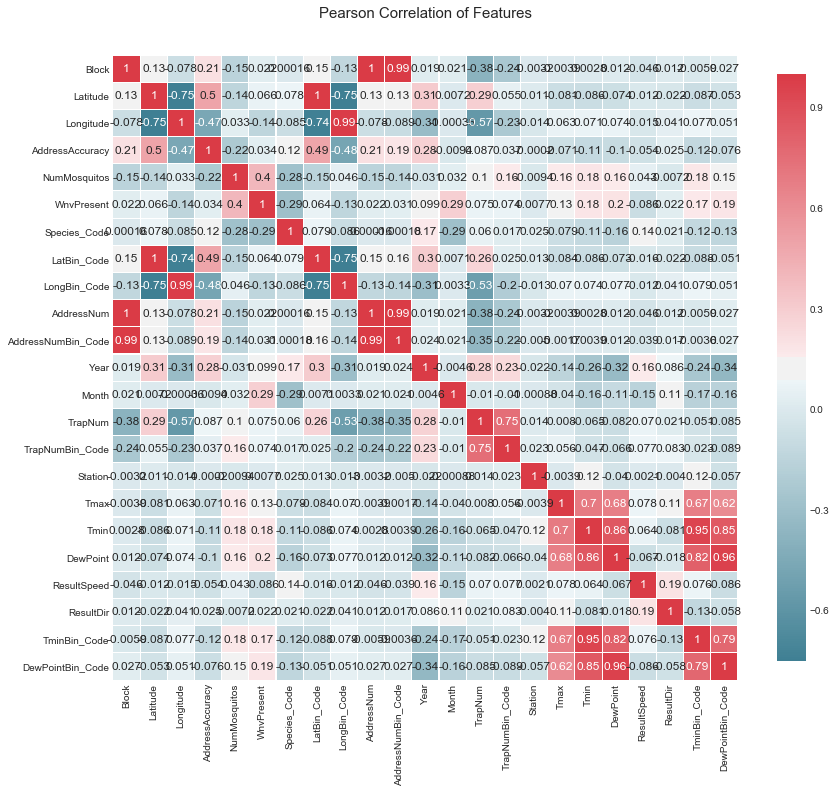

In [14]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data_copy)

In [15]:
    #COMPARING DEM CLASSIFICATION ALGORITHMS

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]




#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train_data_copy[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
  MLA_name = alg.__class__.__name__
  MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
  MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
  cv_results = model_selection.cross_validate(alg, train_data_copy[train_data_copy_x_bin], train_data_copy[Target], cv  = cv_split)

  MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
  MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
  MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
  MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
  alg.fit(train_data_copy[train_data_copy_x_bin], train_data_copy[Target])
  MLA_predict[MLA_name] = alg.predict(train_data_copy[train_data_copy_x_bin])
    
  row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.857719,0.804234,0.0579794,0.103113
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.959637,0.800202,0.052132,0.0213063
5,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.838345,0.799798,0.058582,0.0495073
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.967003,0.798589,0.0419437,0.0197553
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.959839,0.791532,0.066102,0.0247435
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.80222,0.790927,0.0499532,0.110305


Text(0,0.5,'Algorithm')

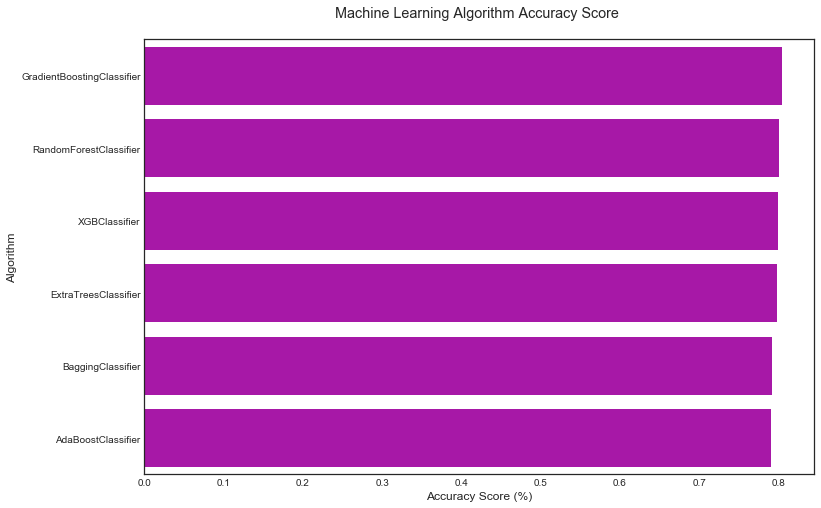

In [16]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

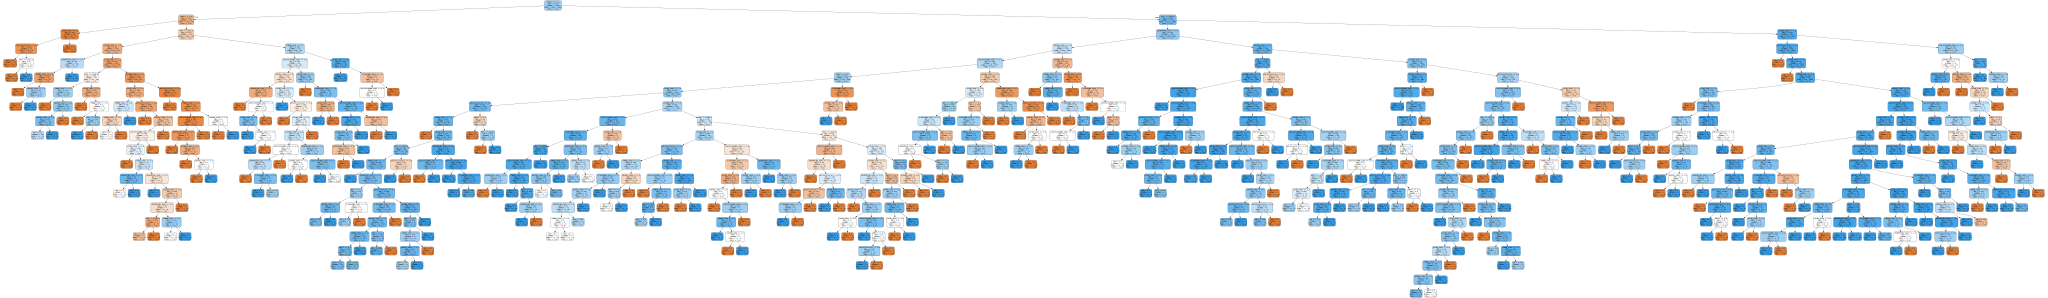

In [17]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz 
dtree = tree.DecisionTreeClassifier(random_state = 0)
dtree.fit(train_data_copy[train_data_copy_x_bin], train_data_copy[Target])
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = train_data_copy_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

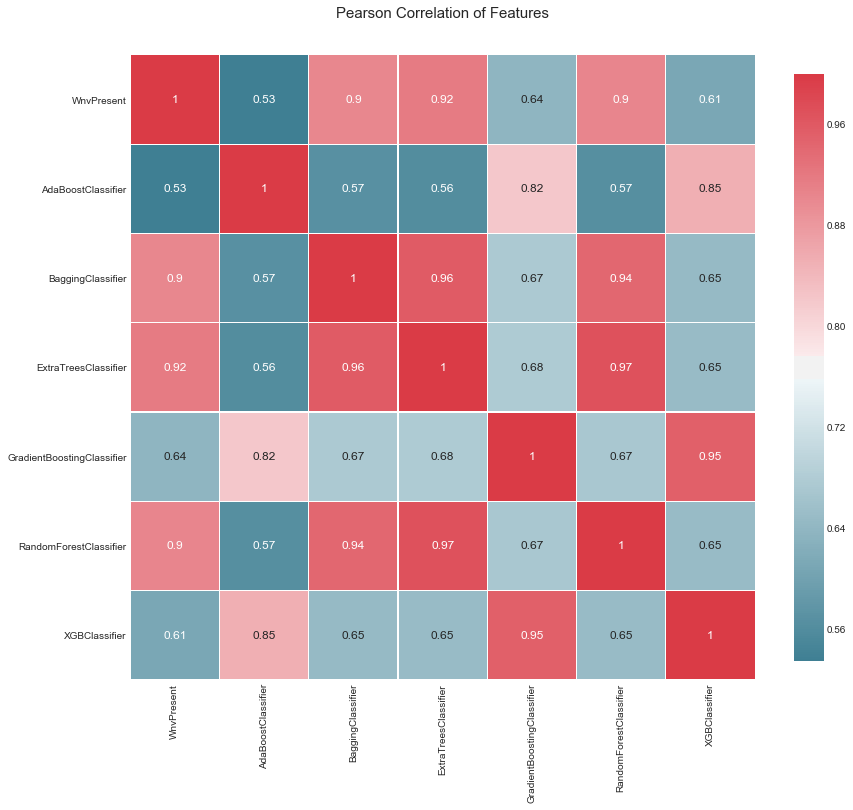

In [18]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

In [19]:
# prepare data for modeling
print(test_data.info())
print("-"*10)
#test_data.sample(10)

grid_learn = [.01, .03, .05, .1, .25]
grid_n_estimator = [10, 50, 100, 300]
grid_seed = [0]

#extreme boosting w/full dataset modeling submission score: defaults= 0.73684, tuned= 0.77990
submit_xgb = XGBClassifier()
submit_xgb = model_selection.GridSearchCV(XGBClassifier(), param_grid= {'learning_rate': grid_learn, 'max_depth': [0,2,4,6,8,10], 'n_estimators': grid_n_estimator, 'seed': grid_seed}, scoring = 'roc_auc', cv = cv_split)
submit_xgb.fit(train_data_copy[train_data_copy_x_bin], train_data_copy[Target])
print('Best Parameters: ', submit_xgb.best_params_) #Best Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}
test_data['WnvPresent'] = submit_xgb.predict(test_data[train_data_copy_x_bin])

#submit file
submit = test_data[['Id','WnvPresent']]
submit.to_csv("./submit.csv", index=False)

print('Validation Data Distribution: \n', test_data['WnvPresent'].value_counts(normalize = True))
submit.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232586 entries, 0 to 232585
Data columns (total 49 columns):
Id                        232586 non-null int64
Date                      232586 non-null object
Address                   232586 non-null object
Species                   232586 non-null object
Block                     232586 non-null int64
Street                    232586 non-null object
Trap                      232586 non-null object
AddressNumberAndStreet    232586 non-null object
Latitude                  232586 non-null float64
Longitude                 232586 non-null float64
AddressAccuracy           232586 non-null int64
Species_Code              232586 non-null int64
LatBin                    232586 non-null category
LatBin_Code               232586 non-null int64
LongBin                   232586 non-null category
LongBin_Code              232586 non-null int64
AddressNum                232586 non-null int64
AddressNumBin             232586 non-null category
Addres

,Id,WnvPresent
163660,81831,1
205018,102510,0
21166,10584,0
201173,100587,0
142624,71313,0
139525,69763,0
146091,73046,1
160642,80322,0
91864,45933,0
3837,1919,0
